In [8]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [9]:
train = pd.read_csv('data/train.csv')
store = pd.read_csv('data/store.csv')
test = pd.read_csv('data/test.csv')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Some plot functions

In [405]:
def remove_axes():
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

In [485]:
def barh(df, col, title=None, show_count=True):
    ser = df[col].value_counts().sort_index(ascending=False)
    plt.figure(figsize=(10, 0.6 * len(ser)))
    try:
        labels = ser.index.astype('int')
        if (ser.index != labels).any():
            labels = ser.index
    except:
        labels = ser.index
    plt.barh(labels, width=ser.values, tick_label=labels)
    if show_count:
        for label in labels:
            if ser[label] < max(ser) / 30:
                plt.text(max(ser) / 30, label, ser[label], color='black', fontsize='large', ha='left', va='center')
            else:
                plt.text(ser[label] / 2, label, ser[label], color='white', fontsize='large', ha='center', va='center')

    plt.title(f'{col} histogram' if title is None else title)
    plt.yticks(labels, labels)
    if show_count:
        plt.xticks([])
    remove_axes()
    plt.show()

In [423]:
def bar_series(ser, col_name, title, show_count=True, figsize=(10, 6), rotation=0):
    plt.figure(figsize=figsize)
    try:
        labels = ser.index.astype('int')
        if (ser.index != labels).any():
            labels = ser.index
    except:
        labels = ser.index
    plt.bar(labels, height=ser.values)
    plt.xticks(ticks=labels, labels=labels, rotation=rotation)
    if show_count:
        for label in labels:
            if ser[label] < max(ser) / 30:
                plt.text(label, max(ser) / 30, ser[label], color='black', fontsize='large', ha='center', va='bottom')
            else:
                plt.text(label, ser[label] / 2, ser[label], color='white', fontsize='large', ha='center', va='center')

#     if show_count:
#         plt.y_ticks([])
    plt.title(title)
#     remove_axes()
    plt.show()

In [419]:
def bar(df, col_name, show_count=True, figsize=(10, 6), rotation=0):
    bar_series(df[col_name].value_counts().sort_index(),
               col_name,
               f'{col_name} histogram',
               show_count,
               figsize,
               rotation)

In [291]:
def hist(df, col, bins=60, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.hist(df[col], bins=bins)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(f'{col} histogram')
    plt.show()

In [292]:
def hist_series(ser, ser_name, bins=60, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.hist(ser, bins=bins)
    plt.xlabel(ser_name)
    plt.ylabel('count')
    plt.title(f'{ser_name} histogram')
    plt.show()

# store

In [21]:
store.info()
store.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


The table contains 10 columns. It contains missing values.

The plot of missing values count:

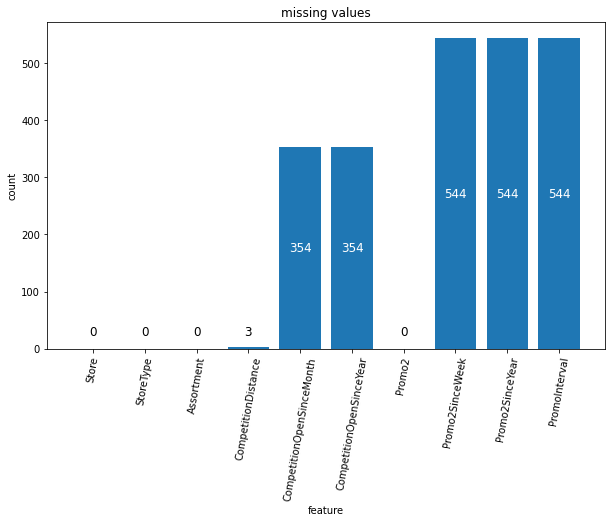

In [277]:
bar_series(title='missing values', ser=na_counts, col_name='feature', rotation=80)

## Store

The identifier of store. Ranges from 1 to 1115.

In [12]:
(pd.RangeIndex(1, 1116) == store.Store).all()

True

As it is the identifier of stores it will be removed when training the models.

## StoreType

The type of store. Its values are 'a', 'b', 'c' and 'd'. The histogram of values:

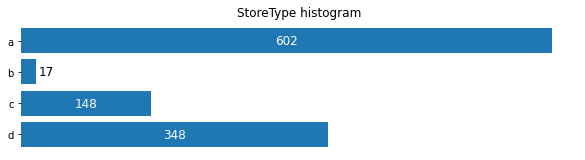

In [407]:
barh(store, 'StoreType')

This feature is categorical and its values are not numeric. So when training models it must be transformed to numeric features e.g. using one-hot encoder.

## Assortment

The type of assortment provided by the store. Its values are 'a', 'b' and 'c'. The histogram of values:

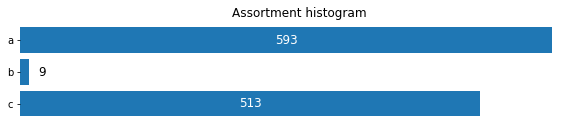

In [408]:
barh(store, 'Assortment')

This feature is also categorical and takes non-numeric values. So it must be transformed to numeric features e.g. using one-hot encoder.

## CompetitionDistance

The distance from the store to the nearest competitor store in meters. There are 3 (or 0.3%) missing values. The distribution of this feature:

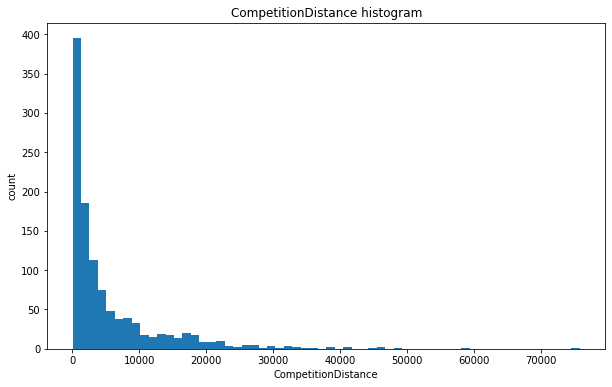

In [278]:
hist(store, 'CompetitionDistance')

This feature is numeric. Its distribution is similar to lognormal. Let's take a logarithm of this feature and show the distribution:

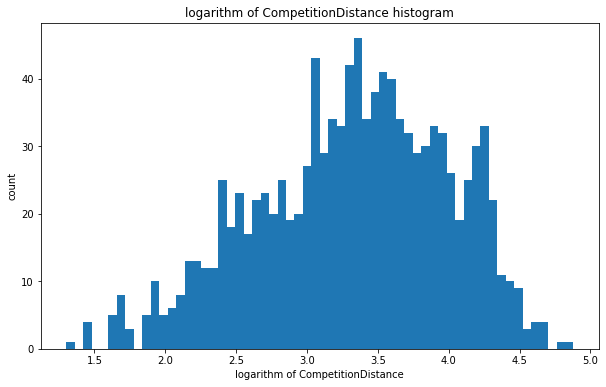

In [279]:
hist_series(np.log10(store.CompetitionDistance), 'logarithm of CompetitionDistance')

It is a bit similar to normal distribution. It is a good information for linear regression because it works better with such features.

The missing values can be replaced with mean value.

## CompetitionOpenSinceMonth

The month of the first opening of the nearest competitor store. There are 354 (or 31.7%) missing values. The distribution of this feature:

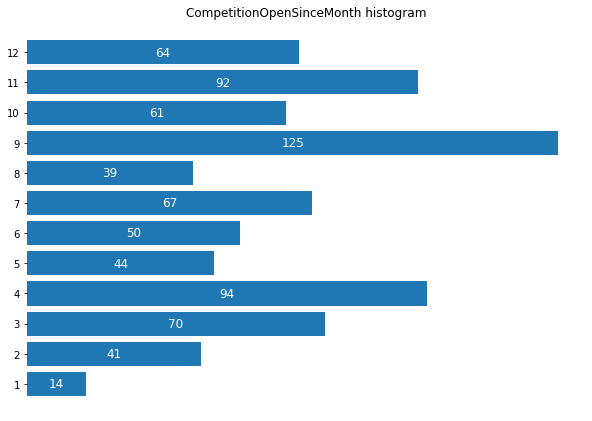

In [479]:
barh(store, 'CompetitionOpenSinceMonth')

## CompetitionOpenSinceYear

The year of the first opening of the nearest competitor store. There are 354 (or 31.7%) missing values. The distribution of this feature:

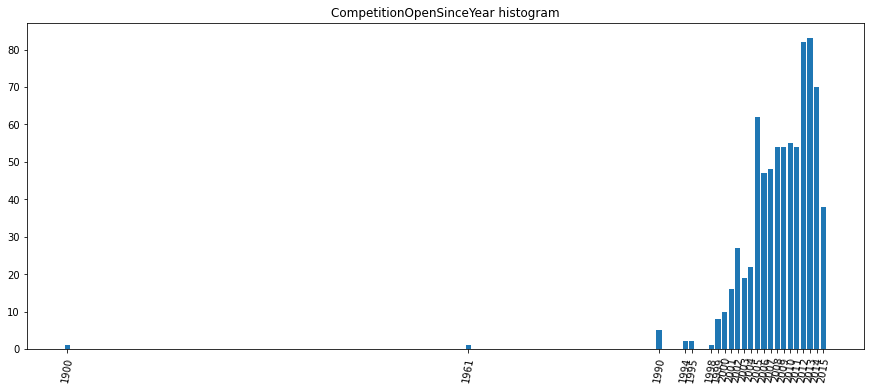

In [424]:
bar(store, 'CompetitionOpenSinceYear', show_count=False, figsize=(15, 6), rotation=80)

As you can see there are two outliers - 1900 and 1961. The distribution without them:

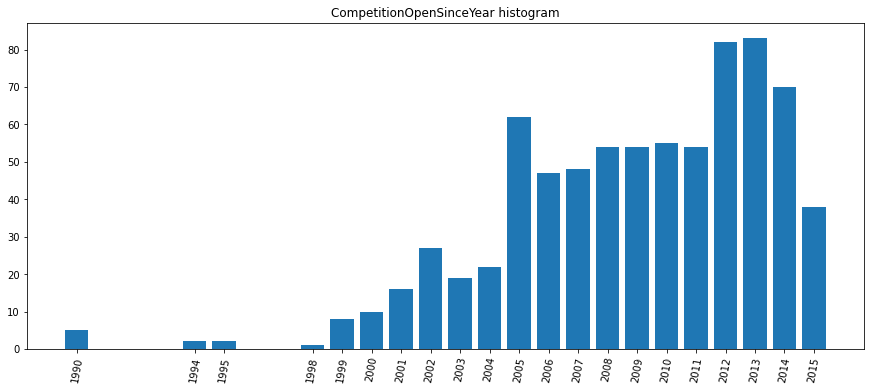

In [425]:
bar(store[~store.CompetitionOpenSinceYear.isin([1900, 1961])],
    'CompetitionOpenSinceYear',
    show_count=False, figsize=(15, 6), rotation=80)

So the most of competitor stores were opened during the last 15 years. The years 1900 and 1961 are the obvious outliers. They are errors because the Rossmann was founded in 1972. So these values must be changed e.g. to mean value or to the year of foundation.

## Promo2

Indicates whether the store is participating in promotion "Promo2" or not. Its values are 0 and 1. The histogram of values:

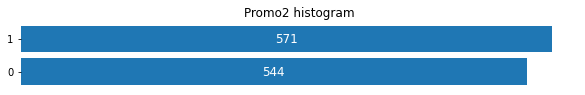

In [426]:
barh(store, 'Promo2')

## Promo2SinceWeek

The week of start of the participating in "Promo2". If Promo2 equals 0, this feature is missed. There are 544 missing values. The histogram of values:

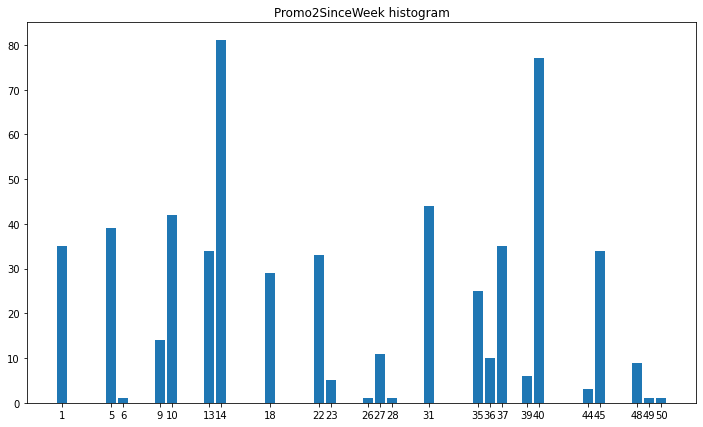

In [427]:
bar(store, 'Promo2SinceWeek', show_count=False, figsize=(12, 7))

## Promo2SinceYear

The week of start of the participating in "Promo2". If Promo2 equals 0, this feature is missed. There are 544 missing values. The histogram of values:

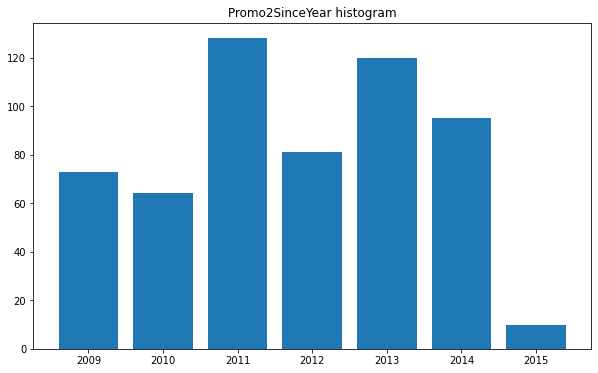

In [428]:
bar(store, 'Promo2SinceYear', show_count=False)

## PromoInterval

The consecutive intervals Promo2 is started, naming the months the promotion is started anew. If Promo2 equals 0, this feature is missed. There are 544 missing values. The histogram of values:

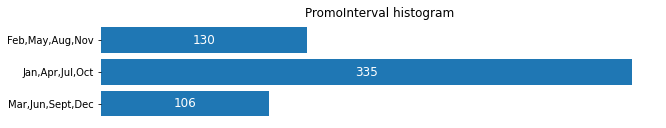

In [429]:
barh(store, 'PromoInterval')

# train

In [22]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


There are no missing values. The table contains 9 columns.

## Store

The id of stores. It ranges from 1 to 1115.

In [310]:
(pd.RangeIndex(1, 1116) == train.Store.unique()).all()

True

## DayOfWeek

The weekday of the entry. It ranges from 1 to 7 and corresponds to names of week: 1 is monday, 2 is tuesday and so on.

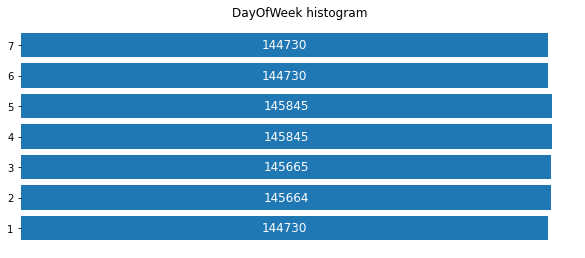

In [431]:
barh(train, 'DayOfWeek')

## Date

The day of entry. In table this feature is a string one. Let's research if there are all the days between the start and end.

In [313]:
dates = train.Date.apply(lambda date: datetime.datetime.strptime(date, '%Y-%m-%d'))
print('The number of unique dates:', dates.nunique())

The number of unique dates: 942


In [319]:
print('The start date in table:', dates.min())
print('The end date in table:', dates.max())
print('The number of different days between them:', (dates.max() - dates.min()).days + 1)

The start date in table: 2013-01-01 00:00:00
The end date in table: 2015-07-31 00:00:00
The number of different days between them: 942


So there are all the days between the start and end ones.

## Open

Indicates whether the store is opened at this day (equals 1) or closed (equals 0). The number of values:

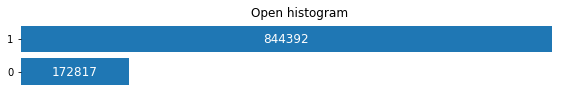

In [432]:
barh(train, 'Open')

There is a significant part of zeros. For such entries the sales equal 0. So the rows where Open equals 0 can be removed.

## Sales (target)

The turnover in this day and this store. It is the numeric feature. The distribution of the feature:

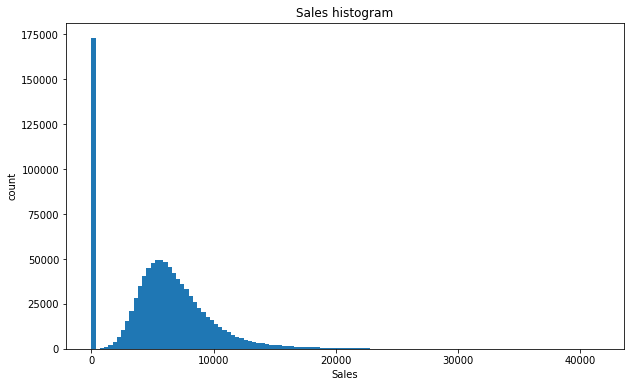

In [433]:
hist(train, 'Sales', bins=120)

Mind the count of zeros. It is explained by the **Open** feature: if it equals 0, then **Sales** also equals 0. The distribution of this feature when **Open** = 1:

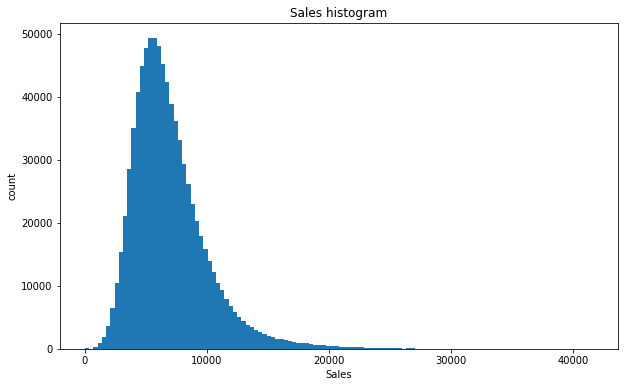

In [323]:
hist(train[train.Open == 1], 'Sales', bins=120)

## Customers

The number of customers in the shop at this day. The distribution of this feature:

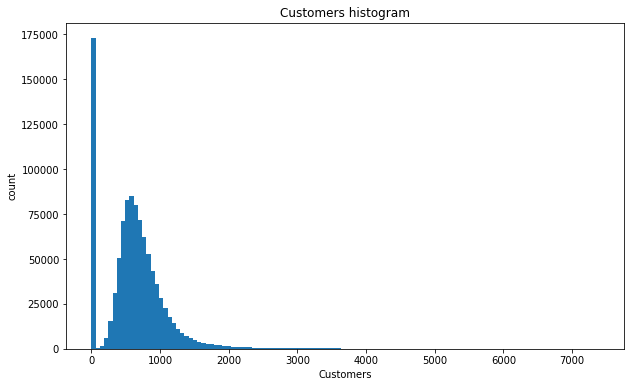

In [325]:
hist(train, 'Customers', bins=120)

As in the **Sales** feature there are many zeros. It is explained by the **Open** feature: if it equals 0, then the number of customers also equals 0. The distribution of this feature when **Open** = 1:

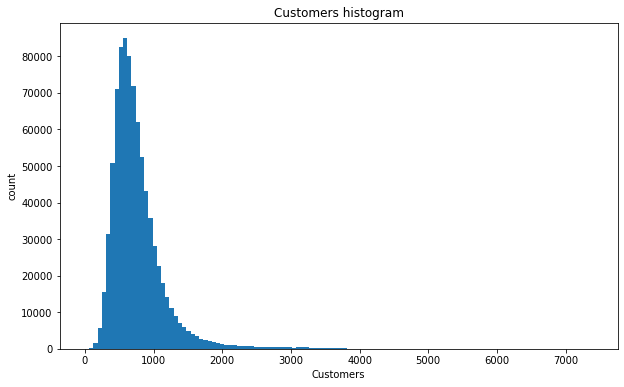

In [326]:
hist(train[train.Open == 1], 'Customers', bins=120)

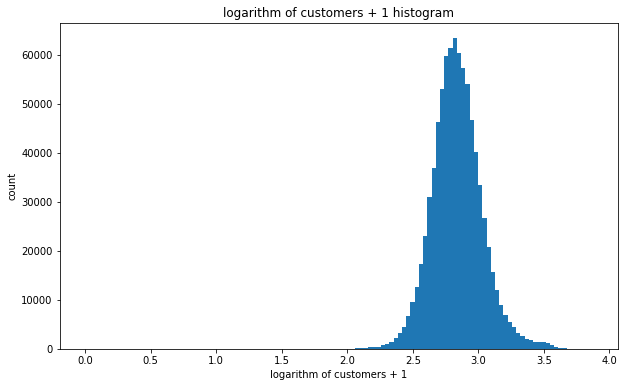

In [374]:
hist_series(np.log10(train[train.Open == 1].Customers + 1), 'logarithm of customers + 1', bins=120)

It is a bit similar to normal distribution. It is a good information for linear regression because it works with such features better.

## Promo

Indicates whether a store is running a promo on that day (equals 1) or not (equals 0). The count of its values

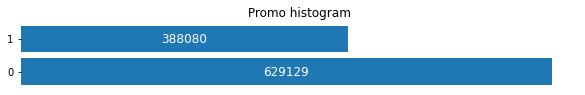

In [434]:
barh(train, 'Promo')

## StateHoliday

Indicates a state holiday. There are four values that means: a - public holiday, b - Easter holiday, c - Christmas, 0 - no holiday. But the columns contains values 0 and '0'. So after casting the numeric values to string let's see the count of values

In [364]:
train.StateHoliday = train.StateHoliday.apply(str)

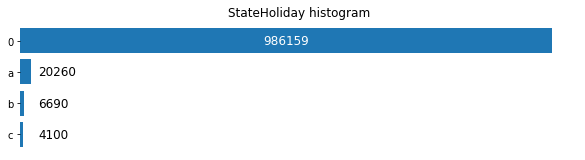

In [435]:
barh(train, 'StateHoliday')

## SchoolHoliday

Indicates if the (Store, Date) was affected by the closure of public schools. The count of values

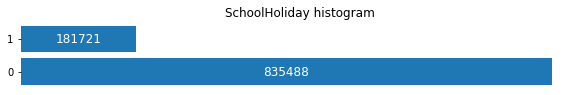

In [436]:
barh(train, 'SchoolHoliday')

The most of days contain the info about all the shops

In [49]:
train.groupby(by='Date').agg({'Date': 'count'}).rename(columns={'Date': 'Count'}).Count.value_counts()

1115    757
935     184
1114      1
Name: Count, dtype: int64

## Some relations between features

Let's see in what days the stores are closed.

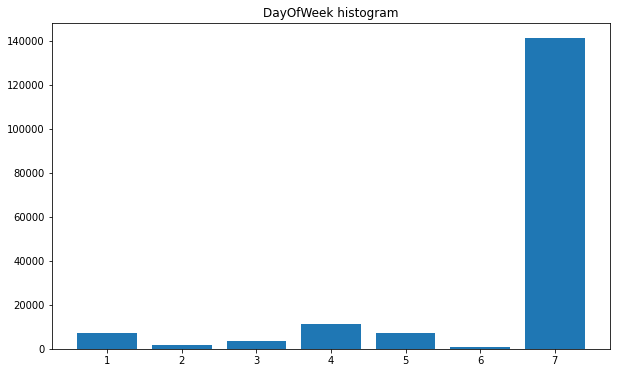

In [450]:
bar(train[train.Open == 0], 'DayOfWeek', show_count=False)

As expected the most stores have a day off as sunday. Let's see in what days the stores are opened.

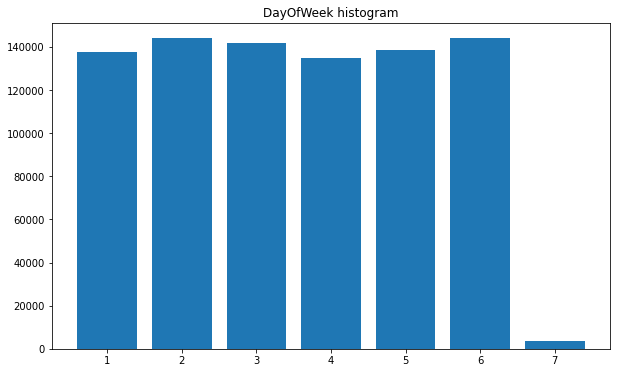

In [452]:
bar(train[train.Open == 1], 'DayOfWeek', show_count=False)

So there is almost no sundays when the stores are opened.

# test

In [23]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


The ***test*** table contains the same columns as the ***train*** table but the columns **Sales** and **Customers**. 

## Id

The identifier of the row used for submission

## Store

The identifier of stores. The number of stores in the table:

In [463]:
test.Store.nunique()

856

But there are 1115 different stores. So not all stores are present in test dataset.

## DayOfWeek

The day of week. The histogram of values:

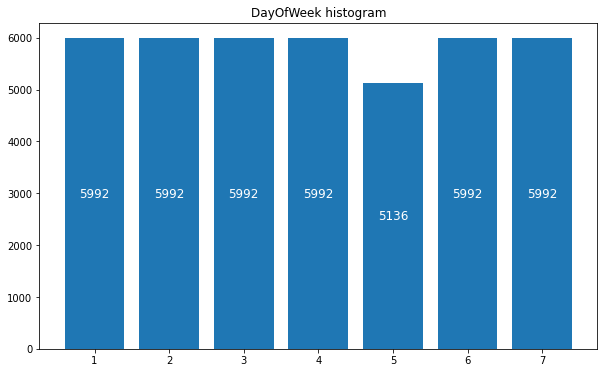

In [466]:
bar(test, 'DayOfWeek')

## Date

In [464]:
test_dates = test.Date.apply(lambda date: datetime.datetime.strptime(date, '%Y-%m-%d'))
print('The number of unique dates:', test_dates.nunique())

The number of unique dates: 48


In [465]:
print('The start date in table:', test_dates.min())
print('The end date in table:', test_dates.max())
print('The number of different days between them:', (test_dates.max() - test_dates.min()).days + 1)

The start date in table: 2015-08-01 00:00:00
The end date in table: 2015-09-17 00:00:00
The number of different days between them: 48


## Open

The column **Open** contain 11 missing values. Let's take a look at the histogram of values:

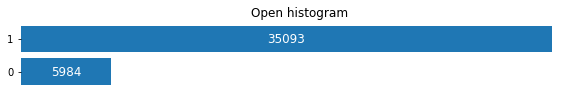

In [437]:
barh(test, 'Open')

There are rows where **Open** equals 0. For such rows the sales count also equals 0.

## Promo

Indicates whether a store is running a promo on that day (equals 1) or not (equals 0). The count of its values

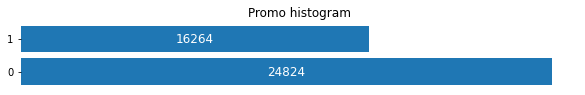

In [467]:
barh(test, 'Promo')

## StateHoliday

Indicates a state holiday. There are four values that means: a - public holiday, b - Easter holiday, c - Christmas, 0 - no holiday.

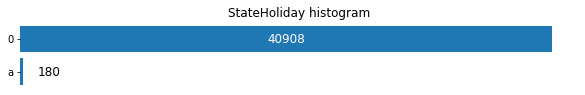

In [471]:
barh(test, 'StateHoliday')

This columns doesn't contain *'b'* and *'c'* values. It is obvious because *'b'* is Easter and *'c'* is Christmas and these holidays are not in the time range of test dataset. As value *'a'* is also a holiday the *'b'* and *'c'* values can be changed to *'a'* in train dataset.

## SchoolHoliday

Indicates if the (Store, Date) was affected by the closure of public schools. The count of values

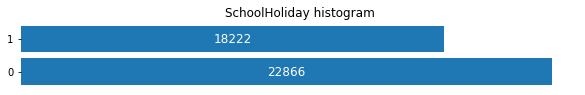

In [472]:
barh(test, 'SchoolHoliday')

The part of ones is greater than in train dataset. Probably in the time range of the test dataset there were autumn holidays.

# Что ещё сделать

- Рассмотреть фичи, которые имеют пропущенные значения, и описать, как можно их заменить
- Возможно показать связь каких-либо фич